In [2]:
# Import necessary libraries
import pandas as pd



In [50]:
# Load the dataset
file_path = 'dataset/METABRIC_RNA_Mutation_without_Mutation_Data_3.csv'  # Dataset source
data = pd.read_csv(file_path)
data['hormone_therapy'].info()
data['hormone_therapy'].describe()
#data.head(3)



<class 'pandas.core.series.Series'>
RangeIndex: 1904 entries, 0 to 1903
Series name: hormone_therapy
Non-Null Count  Dtype
--------------  -----
1904 non-null   int64
dtypes: int64(1)
memory usage: 15.0 KB
Index(['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed',
       'cellularity', 'pam50_+_claudin-low_subtype',
       'er_status_measured_by_ihc', 'er_status',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'inferred_menopausal_state',
       'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code',
       'pr_status', '3-gene_classifier_subtype', 'death_from_cancer'],
      dtype='object')


In [ ]:
'''
columns_to_show = ['chemotherapy', 'hormone_therapy']
# loc accessor to display values
data.loc[:, columns_to_show]
'''
print(data[['chemotherapy', 'hormone_therapy']])

print (data['chemotherapy'].describe())
print(data['chemotherapy'].value_counts())

print (data.columns)

print ("\nShape of data: ", data.shape)


In [14]:
print ("\nMissing values: ", data.isnull().sum().values.sum())

print ("\All Columns: \n", data.columns.tolist())

print ("\nUnique values: \n", data.nunique()) # Number of unique values in each column


categorical_vars = data.select_dtypes(include=['object']).columns
print("\nList of categorical variables:\n ", categorical_vars) 



Missing values:  0
\All Columns: 
 ['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'hormone_therapy', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'oncotree_code', 'overall_survival_months', 'overall_survival', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_size', 'tumor_stage', 'death_from_cancer', 'brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'stk11', 'bard1', 'mlh1', 'msh2', 'msh6', 'pms2', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'rbl2', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'cdk6', 'ccnd2', 'cdkn2a

In [ ]:
# Check for categorical variables and confirm the absence of missing values across all features
categorical_vars = data.select_dtypes(include=['object']).columns
missing_values_total = data.isnull().sum().sum()

print(categorical_vars) # Print categorical variables

print("\nNumber of missing values across all categorical variables: ", missing_values_total) 




In [16]:

# Perform preprocessing on the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding for categorical variables
for col in categorical_vars:
    data[col] = le.fit_transform(data[col])

# Now, standardize the numerical features
# Excluding 'patient_id' as it is an identifier
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.drop('patient_id')

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

dataPrep = data.copy() # Create a copy of the dataframe
# Display the first few rows to confirm changes
dataPrep.head()
dataPrep.to_csv('dataset/AfterPreprocessing_4.csv', index=False)


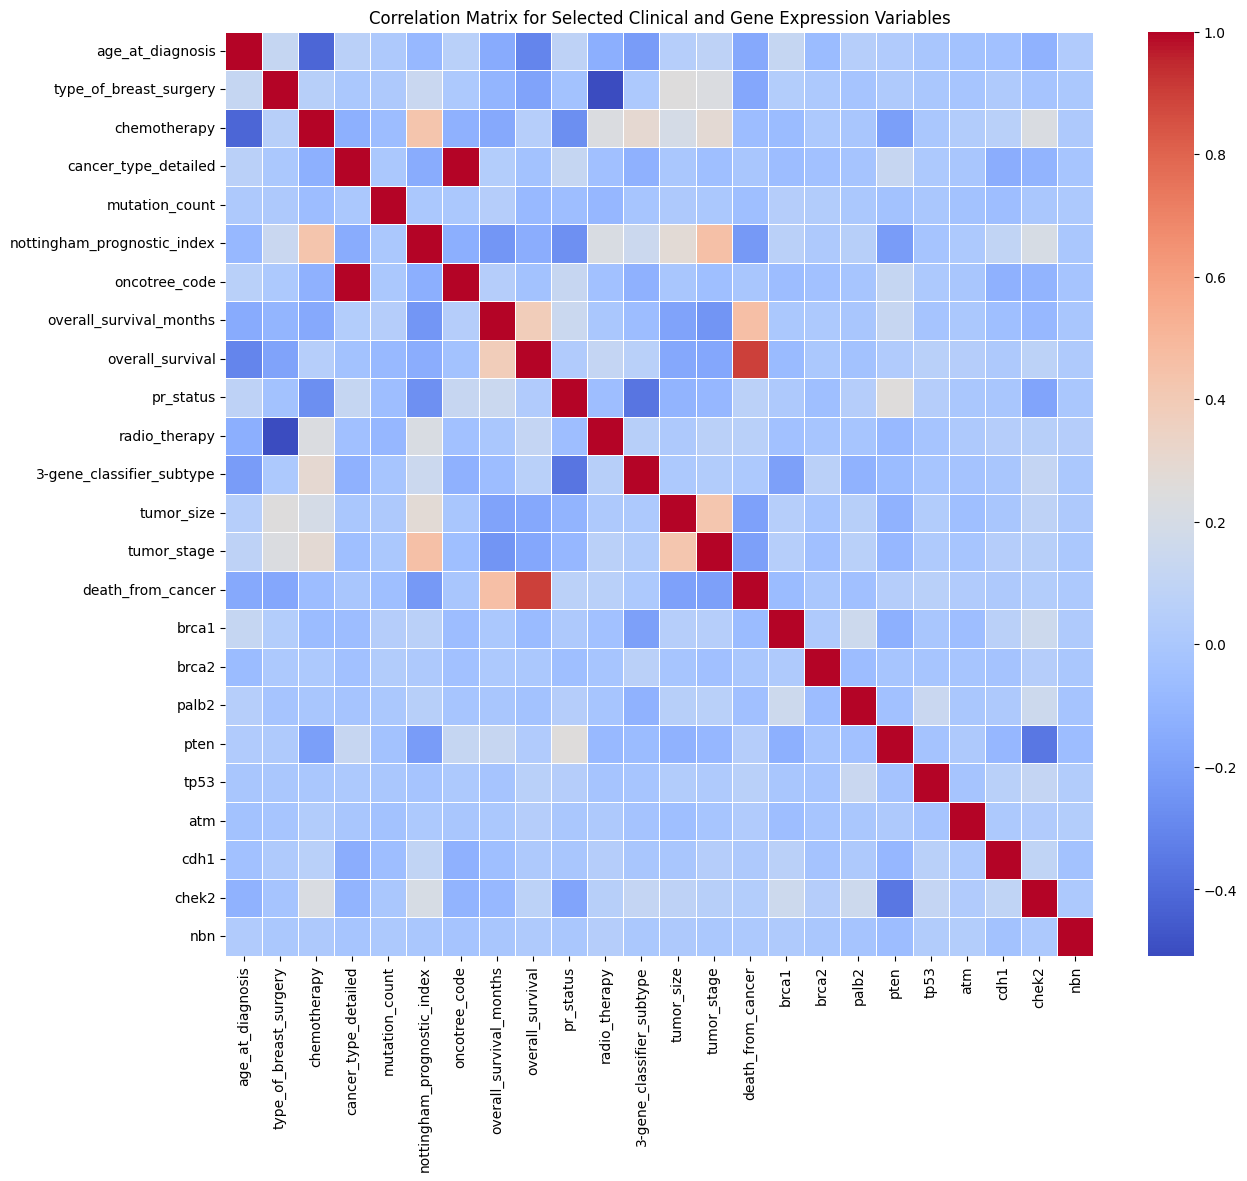

,age_at_diagnosis,type_of_breast_surgery,chemotherapy,cancer_type_detailed
age_at_diagnosis,1.000000,0.119307,-0.416691,0.064898
chemotherapy,-0.416691,0.055625,1.000000,-0.126801
overall_survival,-0.303666,-0.187856,0.045625,-0.034002
3-gene_classifier_subtype,-0.217641,0.004602,0.297977,-0.124778
death_from_cancer,-0.156361,-0.170641,-0.063883,-0.009479
overall_survival_months,-0.150158,-0.102394,-0.159951,0.038648
radio_therapy,-0.134538,-0.508169,0.228283,-0.043177
brca1,0.119670,0.035263,-0.067070,-0.063800
type_of_breast_surgery,0.119307,1.000000,0.055625,0.004255
chek2,-0.114049,-0.023405,0.223529,-0.112477


In [18]:
# Correlation Analysis between Clinical Variables and a Subset of Gene Expression Levels
# Selecting a subset of genes for correlation analysis to manage computational resources
gene_columns = data.columns[20:40]  # Selecting a subset of genes arbitrarily for demonstration
clinical_columns = ['age_at_diagnosis', 'type_of_breast_surgery', 'chemotherapy', 'cancer_type_detailed']

# Creating a new dataframe with both clinical and selected gene expression variables
analysis_df = data[clinical_columns + list(gene_columns)]

# Calculating correlation matrix
corr_matrix = analysis_df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Selected Clinical and Gene Expression Variables')
plt.show()

# Identifying high correlations
high_corr = corr_matrix[clinical_columns].abs().nlargest(10, clinical_columns).index
high_corr_matrix = corr_matrix.loc[high_corr, clinical_columns]

high_corr_matrix


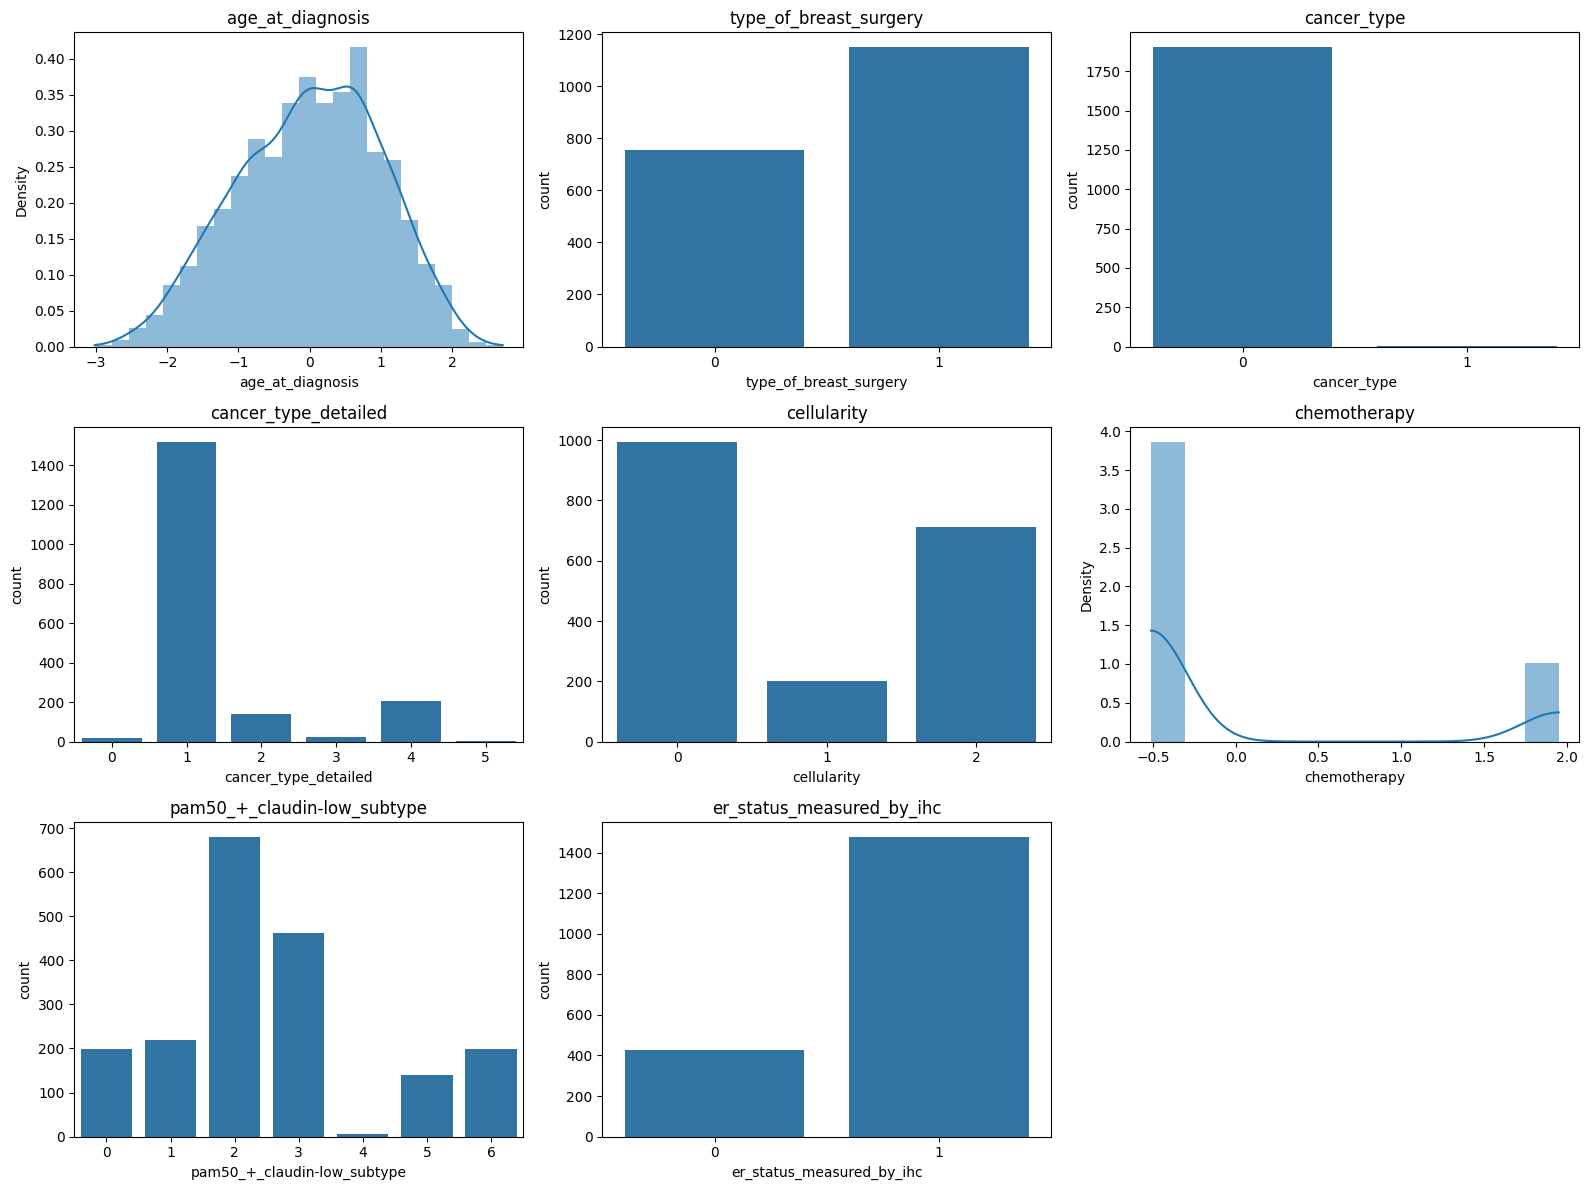

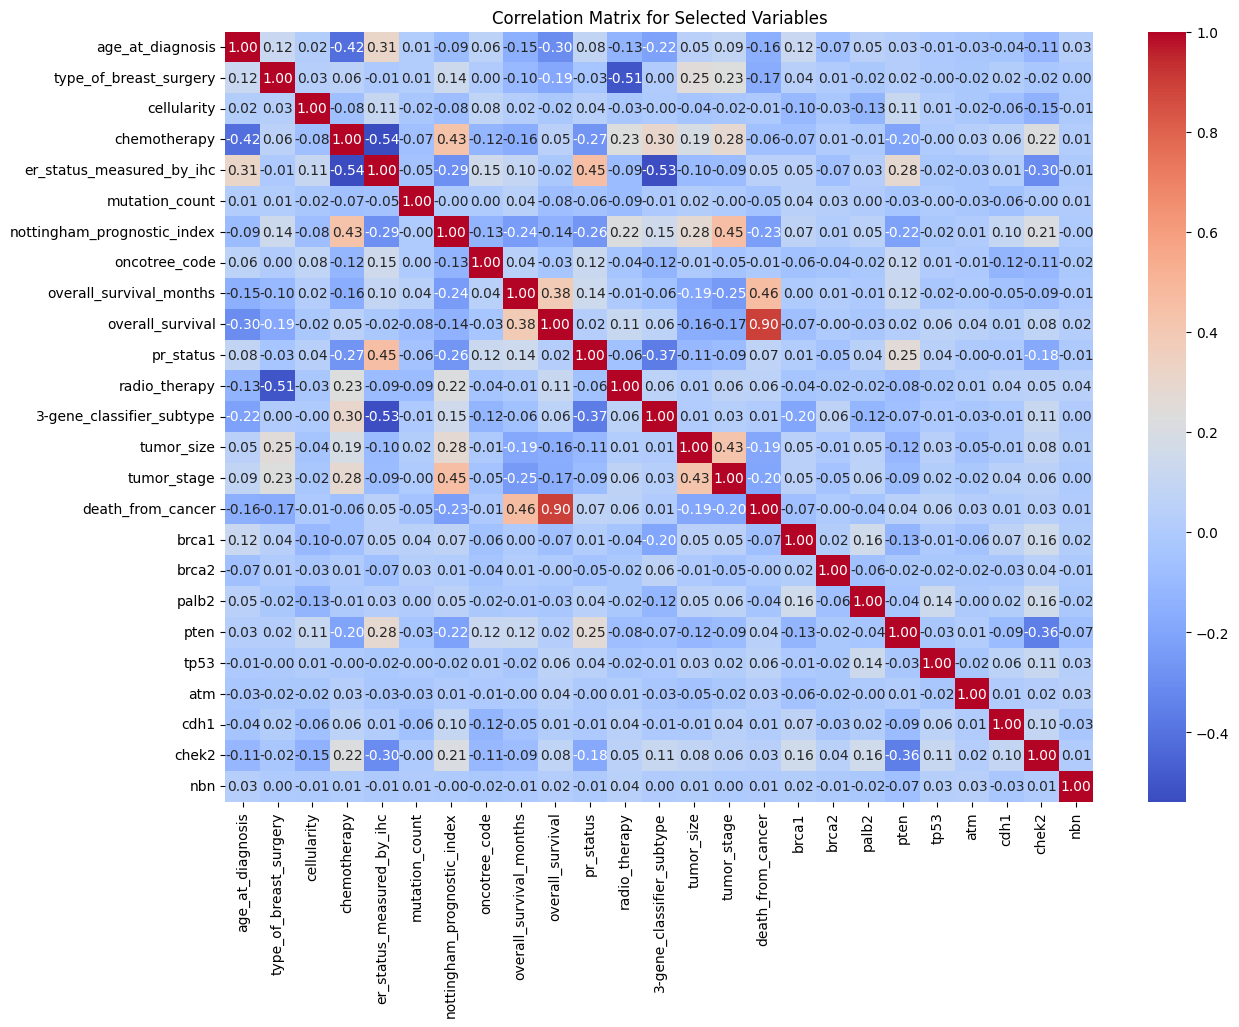

In [19]:

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Variables of interest for distribution analysis
variables_of_interest = ['age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type', 
                         'cancer_type_detailed', 'cellularity', 'chemotherapy', 
                         'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc']

# Plot distribution for each variable of interest
for i, var in enumerate(variables_of_interest, 1):
    plt.subplot(3, 3, i)
    if data[var].dtype == 'float64' or data[var].dtype == 'int64':
        sns.histplot(data[var], kde=True, stat="density", linewidth=0)
    else:
        sns.countplot(x=var, data=data)
    plt.title(var)

plt.tight_layout()
plt.show()

# Correlation Analysis: Focus on clinical variables and a subset of genomic variables for simplicity
# Select a subset of genomic variables for correlation analysis to avoid overloading the plot
genomic_vars_subset = data.columns[20:40]  # Example subset of genomic variables
clinical_vars_for_corr = ['age_at_diagnosis', 'type_of_breast_surgery', 'cellularity', 'chemotherapy', 'er_status_measured_by_ihc']

# Creating a subset of data for correlation analysis
corr_subset = data[clinical_vars_for_corr + list(genomic_vars_subset)]

# Calculate correlation matrix
corr = corr_subset.corr()

# Plot correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Selected Variables')
plt.show()


In [58]:
# Re-importing necessary libraries and redefining variables after code execution state reset
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = 'dataset/AfterPreprocessing_4.csv'
data = pd.read_csv(file_path)

# Preparing the dataset for feature selection and model development
X = data.drop(columns=['patient_id', 'er_status_measured_by_ihc'])  # Features
y = data['er_status_measured_by_ihc']  # Target variable

# Because the chi-squared test requires non-negative values, we'll scale the features to a [0, 1] range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Feature Selection
# Select the top 20 features based on univariate statistical tests
select_k_best = SelectKBest(chi2, k=20)
X_train_selected = select_k_best.fit_transform(X_train, y_train)
X_test_selected = select_k_best.transform(X_test)

# Identify the features selected
features_selected = X.columns[select_k_best.get_support()]

# Model Development
# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_selected, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test_selected)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Features selected: ", features_selected.tolist())
print("\nConfusion Matrix: \n", conf_matrix)
print("\nClassification Report: \n", class_report)



Features selected:  ['chemotherapy', 'er_status', 'neoplasm_histologic_grade', 'her2_status', 'hormone_therapy', 'inferred_menopausal_state', 'pr_status', '3-gene_classifier_subtype', 'ccne1', 'cdkn2a', 'bcl2', 'bmpr1b', 'chek1', 'egfr', 'folr1', 'mmp12', 'gata3', 'mapt', 'ttyh1', 'hsd17b2']

Confusion Matrix: 
 [[ 73  11]
 [  8 289]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        84
           1       0.96      0.97      0.97       297

    accuracy                           0.95       381
   macro avg       0.93      0.92      0.93       381
weighted avg       0.95      0.95      0.95       381



In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_selected, y_train)
# Predictions
rf_pred = rf_model.predict(X_test_selected)
# Evaluation
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_class_report = classification_report(y_test, rf_pred)

# Train the Gradient Boosting Machine model
gbm_model.fit(X_train_selected, y_train)
# Predictions
gbm_pred = gbm_model.predict(X_test_selected)
# Evaluation
gbm_conf_matrix = confusion_matrix(y_test, gbm_pred)
gbm_class_report = classification_report(y_test, gbm_pred)

(rf_conf_matrix, rf_class_report, gbm_conf_matrix, gbm_class_report)

print("\nRandom Forest Confusion Matrix: \n", rf_conf_matrix)
print("\nRandom Forest Classification Report: \n", rf_class_report)
print("\nGradient Boosting Machine Confusion Matrix: \n", gbm_conf_matrix)
print("\nGradient Boosting Machine Classification Report: \n", gbm_class_report)

print("\nFeatures selected: ", features_selected)
print("\nConfusion Matrix: \n", conf_matrix)
print("\nClassification Report: \n", class_report)



(array([[ 77,   7],
        [ 13, 284]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.86      0.92      0.89        84\n           1       0.98      0.96      0.97       297\n\n    accuracy                           0.95       381\n   macro avg       0.92      0.94      0.93       381\nweighted avg       0.95      0.95      0.95       381\n',
 array([[ 76,   8],
        [ 10, 287]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.88      0.90      0.89        84\n           1       0.97      0.97      0.97       297\n\n    accuracy                           0.95       381\n   macro avg       0.93      0.94      0.93       381\nweighted avg       0.95      0.95      0.95       381\n')

In [59]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation with Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train_selected, y_train, cv=5, scoring='accuracy')

# Cross-validation with GBM
gbm_cv_scores = cross_val_score(gbm_model, X_train_selected, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of cross-validation scores for each model
rf_cv_mean, rf_cv_std = np.mean(rf_cv_scores), np.std(rf_cv_scores)
gbm_cv_mean, gbm_cv_std = np.mean(gbm_cv_scores), np.std(gbm_cv_scores)

(rf_cv_mean, rf_cv_std, gbm_cv_mean, gbm_cv_std)


(0.9448339085418465,
 0.00823301532879772,
 0.9487812769628989,
 0.014363183042486585)